In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import xgboost as xgb
from datetime import datetime
import xgboost as xgb  #Libreria de algoriitmo de boosting, sive para hacer la prediccion
from sklearn.metrics import classification_report, confusion_matrix 
import pandas as pd               #Manejo de Datos
import numpy as np                #Calculo numerico
import seaborn as sns             #Libreria de Visualizaciones
import matplotlib.pyplot as plt   #Libreria de Visualizaciones

In [2]:
ipath = 'C:/Users/Ariel Fleiderman/Downloads/credito1.xlsx'
df1 = pd.read_excel(ipath)

In [3]:
ipath = 'C:/Users/Ariel Fleiderman/Downloads/clientes2.xlsx'
df2 = pd.read_excel(ipath)


In [4]:
ipath = 'C:/Users/Ariel Fleiderman/Downloads/credito3.xlsx'
df3 = pd.read_excel(ipath)

In [5]:
data = pd.concat([df1, df2, df3], axis=0)

In [6]:
data.shape

(72447, 42)

In [98]:
data[data.duplicated(keep=False)]

,ID,DNI,CUIT,Nombre completo,Fecha de nacimiento,Clase,Edad,Sexo,Comportamiento 1,Comportamiento 2,...,Periodo 4,Monto 4,Banco 5,Sit 5,Periodo 5,Monto 5,Banco 6,Sit 6,Periodo 6,Monto 6


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72447 entries, 0 to 19175
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   72447 non-null  int64  
 1   DNI                  72447 non-null  int64  
 2   CUIT                 72447 non-null  int64  
 3   Nombre completo      72447 non-null  object 
 4   Fecha de nacimiento  72019 non-null  object 
 5   Clase                72408 non-null  float64
 6   Edad                 72017 non-null  float64
 7   Sexo                 72431 non-null  object 
 8   Comportamiento 1     71740 non-null  object 
 9   Comportamiento 2     52845 non-null  object 
 10  Comportamiento 3     37638 non-null  object 
 11  Comportamiento 4     25377 non-null  object 
 12  Comportamiento 5     16311 non-null  object 
 13  Comportamiento 6     10064 non-null  object 
 14  Comportamiento 7     6023 non-null   object 
 15  Comportamiento 8     3507 non-null  

In [100]:
nullColumns = []    #Lista que contendrá las columnas con valores Nulos
for column in data.columns:
    if data[column].isnull().sum() > 0:
        print(column, data[column].isnull().sum())
        nullColumns.append(column)

Fecha de nacimiento 428
Clase 39
Edad 430
Sexo 16
Comportamiento 1 707
Comportamiento 2 19602
Comportamiento 3 34809
Comportamiento 4 47070
Comportamiento 5 56136
Comportamiento 6 62383
Comportamiento 7 66424
Comportamiento 8 68940
Comportamiento 9 70414
Comportamiento 10 71227
Monto 1 3
Banco 2 27692
Sit 2 27692
Periodo 2 27692
Monto 2 27693
Banco 3 46379
Sit 3 46379
Periodo 3 46379
Monto 3 46379
Banco 4 58443
Sit 4 58443
Periodo 4 58443
Monto 4 58443
Banco 5 65346
Sit 5 65346
Periodo 5 65346
Monto 5 65346
Banco 6 69034
Sit 6 69034
Periodo 6 68982
Monto 6 68982


In [101]:
to_remove = (['Clase','DNI','CUIT','Nombre completo','Fecha de nacimiento'] + [x for x in data.columns if 'Comportamiento ' in x]+ [x for x in data.columns if 'Banco ' in x]+ [x for x in data.columns if 'Periodo ' in x])

In [102]:
data.drop(columns = to_remove, inplace=True)

In [103]:
data.fillna(0, inplace=True)

In [104]:
data.shape

(72447, 15)

In [105]:
data = data.drop(data[data['Edad']<18].index)
data = data.drop(data[data['Edad']>75].index)

In [106]:
data.loc[(data['Edad'] > 17) & (data['Edad'] < 31), 'Edad'] = 1  
data.loc[(data['Edad'] > 30) & (data['Edad'] < 46), 'Edad'] = 2  
data.loc[(data['Edad'] > 45) & (data['Edad'] < 61), 'Edad'] = 3  
data.loc[(data['Edad'] > 60) & (data['Edad'] < 76), 'Edad'] = 4  


In [107]:
data.head(
)

,ID,Edad,Sexo,Sit 1,Monto 1,Sit 2,Monto 2,Sit 3,Monto 3,Sit 4,Monto 4,Sit 5,Monto 5,Sit 6,Monto 6
0,1,1.0,M,1,31000.0,1.0,16000.0,4.0,5000.0,1.0,19000.0,1.0,179000.0,1.0,62000.0
1,2,3.0,M,1,24000.0,1.0,6000.0,4.0,190000.0,1.0,22000.0,1.0,21000.0,1.0,1000.0
2,3,2.0,M,1,2000.0,1.0,2000.0,4.0,100000.0,1.0,2000.0,1.0,6000.0,1.0,11000.0
3,4,3.0,F,1,17000.0,1.0,21000.0,4.0,25000.0,1.0,5000.0,1.0,9000.0,1.0,40000.0
4,5,2.0,F,1,11000.0,1.0,27000.0,4.0,48000.0,1.0,16000.0,1.0,21000.0,1.0,2000.0


In [108]:
data['Edad'].value_counts()

2.0    25213
3.0    16002
1.0    14985
4.0     8826
Name: Edad, dtype: int64

In [109]:
data['Sit 1'].value_counts()

4    26587
1    16126
3    13569
2     8744
Name: Sit 1, dtype: int64

In [110]:
data.loc[(data['Monto 1'] > 0) & (data['Monto 1'] < 10001), 'Monto 1'] = 1  
data.loc[(data['Monto 1'] > 10000) & (data['Monto 1'] < 20001), 'Monto 1'] = 2  
data.loc[(data['Monto 1'] > 20000) & (data['Monto 1'] < 30001), 'Monto 1'] = 3  
data.loc[(data['Monto 1'] > 30000) & (data['Monto 1'] < 40001), 'Monto 1'] = 4  
data.loc[(data['Monto 1'] > 40000) & (data['Monto 1'] < 50001), 'Monto 1'] = 5  
data.loc[(data['Monto 1'] > 50000) & (data['Monto 1'] < 60001), 'Monto 1'] = 6  
data.loc[(data['Monto 1'] > 60000) & (data['Monto 1'] < 70001), 'Monto 1'] = 7  
data.loc[(data['Monto 1'] > 70000) & (data['Monto 1'] < 80001), 'Monto 1'] = 8 
data.loc[(data['Monto 1'] > 80000) & (data['Monto 1'] < 90001), 'Monto 1'] = 9  
data.loc[(data['Monto 1'] > 90000) & (data['Monto 1'] < 100001), 'Monto 1'] = 10 
data.loc[(data['Monto 1'] > 100000), 'Monto 1'] = 11 



In [111]:
data.loc[(data['Monto 2'] > 0) & (data['Monto 2'] < 10001), 'Monto 2'] = 1  
data.loc[(data['Monto 2'] > 10000) & (data['Monto 2'] < 20001), 'Monto 2'] = 2  
data.loc[(data['Monto 2'] > 20000) & (data['Monto 2'] < 30001), 'Monto 2'] = 3  
data.loc[(data['Monto 2'] > 30000) & (data['Monto 2'] < 40001), 'Monto 2'] = 4  
data.loc[(data['Monto 2'] > 40000) & (data['Monto 2'] < 50001), 'Monto 2'] = 5  
data.loc[(data['Monto 2'] > 50000) & (data['Monto 2'] < 60001), 'Monto 2'] = 6  
data.loc[(data['Monto 2'] > 60000) & (data['Monto 2'] < 70001), 'Monto 2'] = 7  
data.loc[(data['Monto 2'] > 70000) & (data['Monto 2'] < 80001), 'Monto 2'] = 8 
data.loc[(data['Monto 2'] > 80000) & (data['Monto 2'] < 90001), 'Monto 2'] = 9  
data.loc[(data['Monto 2'] > 90000) & (data['Monto 2'] < 100001), 'Monto 2'] = 10 
data.loc[(data['Monto 2'] > 100000), 'Monto 2'] = 11 


In [112]:
data.loc[(data['Monto 3'] > 0) & (data['Monto 3'] < 10001), 'Monto 3'] = 1  
data.loc[(data['Monto 3'] > 10000) & (data['Monto 3'] < 20001), 'Monto 3'] = 2  
data.loc[(data['Monto 3'] > 20000) & (data['Monto 3'] < 30001), 'Monto 3'] = 3  
data.loc[(data['Monto 3'] > 30000) & (data['Monto 3'] < 40001), 'Monto 3'] = 4  
data.loc[(data['Monto 3'] > 40000) & (data['Monto 3'] < 50001), 'Monto 3'] = 5  
data.loc[(data['Monto 3'] > 50000) & (data['Monto 3'] < 60001), 'Monto 3'] = 6  
data.loc[(data['Monto 3'] > 60000) & (data['Monto 3'] < 70001), 'Monto 3'] = 7  
data.loc[(data['Monto 3'] > 70000) & (data['Monto 3'] < 80001), 'Monto 3'] = 8 
data.loc[(data['Monto 3'] > 80000) & (data['Monto 3'] < 90001), 'Monto 3'] = 9  
data.loc[(data['Monto 3'] > 90000) & (data['Monto 3'] < 100001), 'Monto 3'] = 10 
data.loc[(data['Monto 3'] > 100000), 'Monto 3'] = 11 


In [113]:
data.loc[(data['Monto 4'] > 0) & (data['Monto 4'] < 10001), 'Monto 4'] = 1  
data.loc[(data['Monto 4'] > 10000) & (data['Monto 4'] < 20001), 'Monto 4'] = 2  
data.loc[(data['Monto 4'] > 20000) & (data['Monto 4'] < 30001), 'Monto 4'] = 3  
data.loc[(data['Monto 4'] > 30000) & (data['Monto 4'] < 40001), 'Monto 4'] = 4  
data.loc[(data['Monto 4'] > 40000) & (data['Monto 4'] < 50001), 'Monto 4'] = 5  
data.loc[(data['Monto 4'] > 50000) & (data['Monto 4'] < 60001), 'Monto 4'] = 6  
data.loc[(data['Monto 4'] > 60000) & (data['Monto 4'] < 70001), 'Monto 4'] = 7  
data.loc[(data['Monto 4'] > 70000) & (data['Monto 4'] < 80001), 'Monto 4'] = 8 
data.loc[(data['Monto 1'] > 80000) & (data['Monto 4'] < 90001), 'Monto 4'] = 9  
data.loc[(data['Monto 4'] > 90000) & (data['Monto 4'] < 100001), 'Monto 4'] = 10 
data.loc[(data['Monto 4'] > 100000), 'Monto 4'] = 11 


In [114]:
data.loc[(data['Monto 5'] > 0) & (data['Monto 5'] < 10001), 'Monto 5'] = 1  
data.loc[(data['Monto 5'] > 10000) & (data['Monto 5'] < 20001), 'Monto 5'] = 2  
data.loc[(data['Monto 5'] > 20000) & (data['Monto 5'] < 30001), 'Monto 5'] = 3  
data.loc[(data['Monto 5'] > 30000) & (data['Monto 5'] < 40001), 'Monto 5'] = 4  
data.loc[(data['Monto 5'] > 40000) & (data['Monto 5'] < 50001), 'Monto 5'] = 5  
data.loc[(data['Monto 5'] > 50000) & (data['Monto 5'] < 60001), 'Monto 5'] = 6  
data.loc[(data['Monto 5'] > 60000) & (data['Monto 5'] < 70001), 'Monto 5'] = 7
data.loc[(data['Monto 5'] > 70000) & (data['Monto 5'] < 80001), 'Monto 5'] = 8
data.loc[(data['Monto 5'] > 80000) & (data['Monto 5'] < 90001), 'Monto 5'] = 9  
data.loc[(data['Monto 5'] > 90000) & (data['Monto 5'] < 100001), 'Monto 5'] = 10 
data.loc[(data['Monto 5'] > 100000), 'Monto 5'] = 11 


In [115]:
data.loc[(data['Monto 6'] > 0) & (data['Monto 6'] < 10001), 'Monto 6'] = 1  
data.loc[(data['Monto 6'] > 10000) & (data['Monto 6'] < 20001), 'Monto 6'] = 2  
data.loc[(data['Monto 6'] > 20000) & (data['Monto 6'] < 30001), 'Monto 6'] = 3  
data.loc[(data['Monto 6'] > 30000) & (data['Monto 6'] < 40001), 'Monto 6'] = 4  
data.loc[(data['Monto 6'] > 40000) & (data['Monto 6'] < 50001), 'Monto 6'] = 5  
data.loc[(data['Monto 6'] > 50000) & (data['Monto 6'] < 60001), 'Monto 6'] = 6  
data.loc[(data['Monto 6'] > 60000) & (data['Monto 6'] < 70001), 'Monto 6'] = 7  
data.loc[(data['Monto 6'] > 70000) & (data['Monto 6'] < 80001), 'Monto 6'] = 8 
data.loc[(data['Monto 6'] > 80000) & (data['Monto 6'] < 90001), 'Monto 6'] = 9  
data.loc[(data['Monto 6'] > 90000) & (data['Monto 6'] < 100001), 'Monto 6'] = 10 
data.loc[(data['Monto 6'] > 100000), 'Monto 6'] = 11 


In [116]:
data_filtrado = pd.get_dummies(data['Sexo'], prefix='sex') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data = pd.concat([data_filtrado, data], axis=1)                          #Concatenamos los dos dataframes
del data_filtrado

In [117]:
data.head()

,sex_0,sex_C,sex_F,sex_M,ID,Edad,Sexo,Sit 1,Monto 1,Sit 2,Monto 2,Sit 3,Monto 3,Sit 4,Monto 4,Sit 5,Monto 5,Sit 6,Monto 6
0,0,0,0,1,1,1.0,M,1,4.0,1.0,2.0,4.0,1.0,1.0,2.0,1.0,11.0,1.0,7.0
1,0,0,0,1,2,3.0,M,1,3.0,1.0,1.0,4.0,11.0,1.0,3.0,1.0,3.0,1.0,1.0
2,0,0,0,1,3,2.0,M,1,1.0,1.0,1.0,4.0,10.0,1.0,1.0,1.0,1.0,1.0,2.0
3,0,0,1,0,4,3.0,F,1,2.0,1.0,3.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0
4,0,0,1,0,5,2.0,F,1,2.0,1.0,3.0,4.0,5.0,1.0,2.0,1.0,3.0,1.0,1.0


In [118]:
data['total_monto'] = data[["Monto 1", "Monto 2", "Monto 3", "Monto 4", "Monto 5", "Monto 6"]].sum(axis=1)
data['scoring_total'] = data[["Sit 1", "Sit 2", "Sit 3", "Sit 4", "Sit 5", "Sit 6"]].sum(axis=1)

In [119]:
data['sit1_1'] = (data['Sit 1']!=0).astype(int)
data['sit1_2'] = (data['Sit 2']!=0).astype(int)
data['sit1_3'] = (data['Sit 3']!=0).astype(int)
data['sit1_4'] = (data['Sit 4']!=0).astype(int)
data['sit1_5'] = (data['Sit 5']!=0).astype(int)
data['sit1_6'] = (data['Sit 6']!=0).astype(int)
data['cantidad_de_bancos'] = data[["sit1_1", "sit1_2", "sit1_3", "sit1_4", "sit1_5", "sit1_6"]].sum(axis=1)

In [120]:
data['total_scoring_promedio'] = data['scoring_total']/data['cantidad_de_bancos']

In [121]:
data['monto_credito_prom']= data['total_monto']/data['cantidad_de_bancos']

In [122]:
to_remove = (['Sexo','sit1_1','sit1_2','sit1_3','sit1_4','sit1_5','sit1_6'])
data.drop(columns = to_remove, inplace=True)

In [123]:
data['sit1_1'] = (data['Sit 1']>2).astype(int)
data['sit1_2'] = (data['Sit 2']>2).astype(int)
data['sit1_3'] = (data['Sit 3']>2).astype(int)
data['sit1_4'] = (data['Sit 4']>2).astype(int)
data['sit1_5'] = (data['Sit 5']>2).astype(int)
data['sit1_6'] = (data['Sit 6']>2).astype(int)
data['cantidad_creditos_morosos'] = data[["sit1_1", "sit1_2", "sit1_3", "sit1_4", "sit1_5", "sit1_6"]].sum(axis=1)

In [124]:
to_remove = (['sit1_1','sit1_2','sit1_3','sit1_4','sit1_5','sit1_6'])
data.drop(columns = to_remove, inplace=True)

In [125]:
data.loc[(data['total_scoring_promedio'] > 0) & (data['total_scoring_promedio'] < 1.1), 'total_scoring_promedio'] = 1  
data.loc[(data['total_scoring_promedio'] > 1.1) & (data['total_scoring_promedio'] < 2.1), 'total_scoring_promedio'] = 2  
data.loc[(data['total_scoring_promedio'] > 2.1) & (data['total_scoring_promedio'] < 3.1), 'total_scoring_promedio'] = 3  
data.loc[(data['total_scoring_promedio'] > 3.1) & (data['total_scoring_promedio'] < 4.1), 'total_scoring_promedio'] = 4  


In [126]:
data.loc[(data['monto_credito_prom'] > 0) & (data['monto_credito_prom'] < 1.1), 'monto_credito_prom'] = 1  
data.loc[(data['monto_credito_prom'] > 1.1) & (data['monto_credito_prom'] < 2.1), 'monto_credito_prom'] = 2  
data.loc[(data['monto_credito_prom'] > 2.1) & (data['monto_credito_prom'] < 3.1), 'monto_credito_prom'] = 3  
data.loc[(data['monto_credito_prom'] > 3.1) & (data['monto_credito_prom'] < 4.1), 'monto_credito_prom'] = 4  
data.loc[(data['monto_credito_prom'] > 4.1) & (data['monto_credito_prom'] < 5.1), 'monto_credito_prom'] = 5  
data.loc[(data['monto_credito_prom'] > 5.1) & (data['monto_credito_prom'] < 6.1), 'monto_credito_prom'] = 6  
data.loc[(data['monto_credito_prom'] > 6.1) & (data['monto_credito_prom'] < 7.1), 'monto_credito_prom'] = 7  
data.loc[(data['monto_credito_prom'] > 7.1) & (data['monto_credito_prom'] < 8.1), 'monto_credito_prom'] = 8 
data.loc[(data['monto_credito_prom'] > 8.1) & (data['monto_credito_prom'] < 9.1), 'monto_credito_prom'] = 9  
data.loc[(data['monto_credito_prom'] > 9.1) & (data['monto_credito_prom'] < 10.1), 'monto_credito_prom'] = 10 
data.loc[(data['monto_credito_prom'] > 10), 'monto_credito_prom'] = 11 

In [127]:
data.loc[(data['total_monto'] > 0) & (data['total_monto'] < 1.1), 'total_monto'] = 1  
data.loc[(data['total_monto'] > 1.1) & (data['total_monto'] < 2.1), 'total_monto'] = 2  
data.loc[(data['total_monto'] > 2.1) & (data['total_monto'] < 3.1), 'total_monto'] = 3  
data.loc[(data['total_monto'] > 3.1) & (data['total_monto'] < 4.1), 'total_monto'] = 4  
data.loc[(data['total_monto'] > 4.1) & (data['total_monto'] < 5.1), 'total_monto'] = 5  
data.loc[(data['total_monto'] > 5.1) & (data['total_monto'] < 6.1), 'total_monto'] = 6  
data.loc[(data['total_monto'] > 6.1) & (data['total_monto'] < 7.1), 'total_monto'] = 7  
data.loc[(data['total_monto'] > 7.1) & (data['total_monto'] < 8.1), 'total_monto'] = 8 
data.loc[(data['total_monto'] > 8.1) & (data['total_monto'] < 9.1), 'total_monto'] = 9  
data.loc[(data['total_monto'] > 9.1) & (data['total_monto'] < 10.1), 'total_monto'] = 10 
data.loc[(data['total_monto'] > 10), 'total_monto'] = 11 

In [128]:
data['total_monto'].describe()

count    65026.000000
mean         6.120290
std          4.018338
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max         11.000000
Name: total_monto, dtype: float64

In [129]:
data['monto_credito_prom']= data['total_monto']/data['cantidad_de_bancos']

In [77]:
#Importación de las librerías de interés
import numpy as np                # linear algebra
import pandas as pd               # data frames
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
import scipy.stats                # statistics

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import complete, fcluster #Cluster Jerarquico Completo

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [78]:
X=data

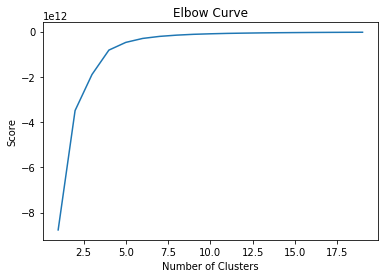

In [79]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [80]:
from sklearn.cluster import KMeans

cluster = 4

kmeans = KMeans(n_clusters=cluster, # numero de clusters
                init="random", 
                random_state=10)

kmeans.fit(X.values) # entrenamos

KMeans(init='random', n_clusters=4, random_state=10)

In [81]:
kmeans.fit_predict(X.values).shape

(65026,)

In [82]:
kmeans = KMeans(n_clusters=4, # numero de clusters
                init="random", 
                random_state=10)

X['clusters'] = kmeans.fit_predict(X.values) # entrenamos y predecimos

In [83]:
data.head(23000)


,sex_0,sex_C,sex_F,sex_M,ID,Edad,Sit 1,Monto 1,Sit 2,Monto 2,...,Monto 5,Sit 6,Monto 6,total_monto,scoring_total,cantidad_de_bancos,total_scoring_promedio,monto_credito_prom,cantidad_creditos_morosos,clusters
0,0,0,0,1,1,1.0,1,4.0,1.0,2.0,...,11.0,1.0,7.0,11.0,9.0,6,2.0,1.833333,1,0
1,0,0,0,1,2,3.0,1,3.0,1.0,1.0,...,3.0,1.0,1.0,11.0,9.0,6,2.0,1.833333,1,0
2,0,0,0,1,3,2.0,1,1.0,1.0,1.0,...,1.0,1.0,2.0,11.0,9.0,6,2.0,1.833333,1,0
3,0,0,1,0,4,3.0,1,2.0,1.0,3.0,...,1.0,1.0,4.0,11.0,9.0,6,2.0,1.833333,1,0
4,0,0,1,0,5,2.0,1,2.0,1.0,3.0,...,3.0,1.0,1.0,11.0,9.0,6,2.0,1.833333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25600,0,0,1,0,25601,2.0,4,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,1,4.0,4.000000,1,3
25601,0,0,0,1,25602,3.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,1,4.0,1.000000,1,3
25602,0,0,1,0,25603,2.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,1,4.0,1.000000,1,3
25603,0,0,1,0,25604,2.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,1,4.0,1.000000,1,3


In [84]:
!pip install yellowbrick

In [85]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

C:\Users\Ariel Fleiderman\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [86]:


# Instantiate the clustering model and visualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

KeyboardInterrupt: 

In [ ]:


# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:


# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
list(data)

In [ ]:
plot = pd.crosstab(index=data['clusters'],
            columns=data['total_scoring_promedio']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['clusters'],
            columns=data['cantidad_de_bancos']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['clusters'],
            columns=data['cantidad_creditos_morosos']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)


plot = pd.crosstab(index=data['clusters'],
            columns=data['sex_F']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['clusters'],
            columns=data['Edad']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['clusters'],
            columns=data['total_monto']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [ ]:
pd.pivot_table(data, index=['clusters'],
                        columns=['sex_F','Sit 1'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]
# vemos los primeros 30 registros

In [ ]:
pd.pivot_table(data, index=['clusters'],
  columns=['Edad','Sit 1'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30] # vemos los primeros 30 registros

In [ ]:
pd.pivot_table(data, index=['clusters'],
  columns=['Edad','Sit 2'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['clusters'],
  columns=['Edad','Sit 3'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['clusters'],
  columns=['total_scoring_promedio'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['clusters'],
  columns=['monto_credito_prom'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['clusters'],
  columns=['cantidad_creditos_morosos'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['Edad'],
  columns=['cantidad_creditos_morosos'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['total_scoring_promedio'],
  columns=['cantidad_creditos_morosos'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['total_scoring_promedio'],
  columns=['Edad'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['Edad'],
  columns=['cantidad_creditos_morosos'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

In [ ]:
pd.pivot_table(data, index=['cantidad_creditos_morosos'],
  columns=['monto_credito_prom'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

Construccion del target

In [130]:
#moroso es aquel que tiene en credito en estado 3 o 4 y debe mas que el promedio
data['target'] = (data['cantidad_creditos_morosos']> 0) & (data['monto_credito_prom'] > 3.6).astype(bool)

In [131]:
data1 = pd.get_dummies(data['target'], prefix='target') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
data = pd.concat([data1, data], axis=1)                          #Concatenamos los dos dataframes
del data1

In [132]:
to_remove = (['target','target_False'])
data.drop(columns = to_remove, inplace=True)

In [133]:
data.head()

,target_True,sex_0,sex_C,sex_F,sex_M,ID,Edad,Sit 1,Monto 1,Sit 2,...,Sit 5,Monto 5,Sit 6,Monto 6,total_monto,scoring_total,cantidad_de_bancos,total_scoring_promedio,monto_credito_prom,cantidad_creditos_morosos
0,0,0,0,0,1,1,1.0,1,4.0,1.0,...,1.0,11.0,1.0,7.0,11.0,9.0,6,2.0,1.833333,1
1,0,0,0,0,1,2,3.0,1,3.0,1.0,...,1.0,3.0,1.0,1.0,11.0,9.0,6,2.0,1.833333,1
2,0,0,0,0,1,3,2.0,1,1.0,1.0,...,1.0,1.0,1.0,2.0,11.0,9.0,6,2.0,1.833333,1
3,0,0,0,1,0,4,3.0,1,2.0,1.0,...,1.0,1.0,1.0,4.0,11.0,9.0,6,2.0,1.833333,1
4,0,0,0,1,0,5,2.0,1,2.0,1.0,...,1.0,3.0,1.0,1.0,11.0,9.0,6,2.0,1.833333,1


Correlaciones

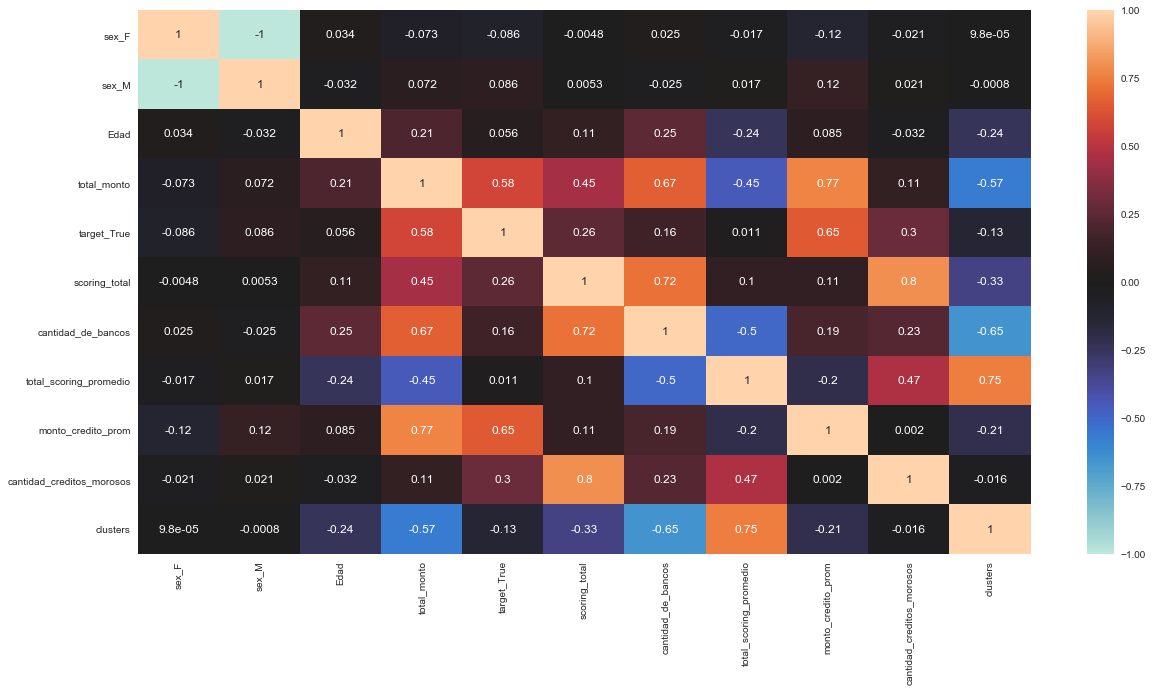

In [448]:
analisis = data[['sex_F', 'sex_M', 'Edad', 'total_monto', 'target_True','scoring_total',
 'cantidad_de_bancos',
 'total_scoring_promedio',
 'monto_credito_prom',
 'cantidad_creditos_morosos',
 'clusters']].corr()
plt.figure(figsize=(20,10))
#Plot the heatmap
sns.heatmap(analisis, 
        annot = True, vmin=-1, vmax=1, center= 0,
        xticklabels=analisis.columns,
        yticklabels=analisis.columns);

Composicion target

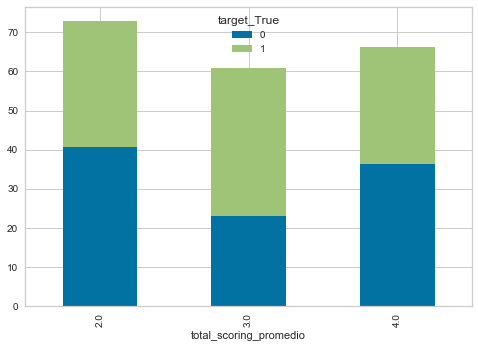

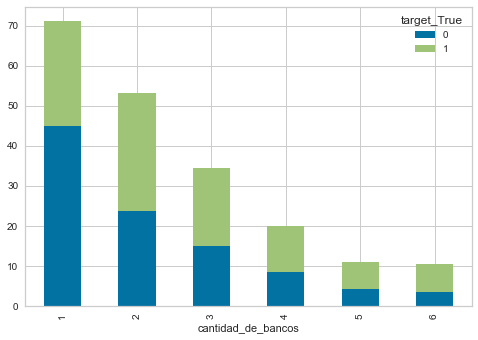

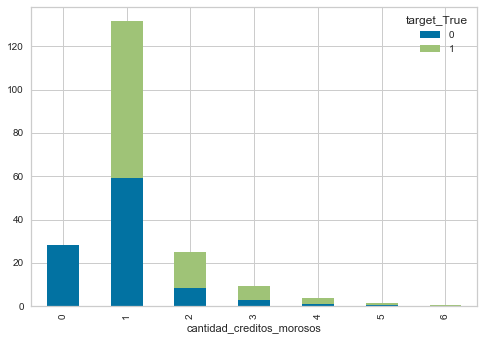

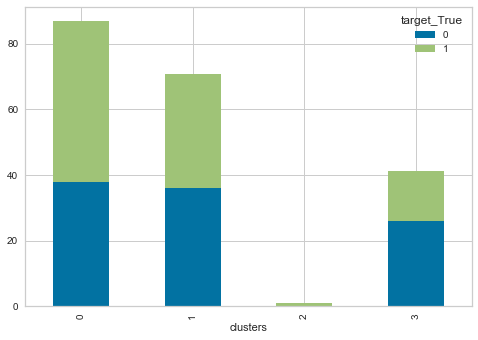

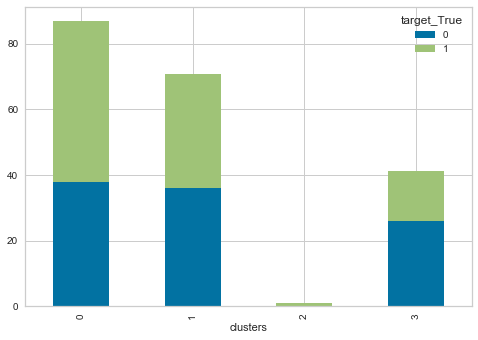

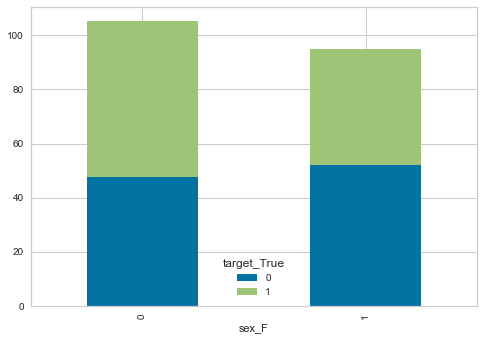

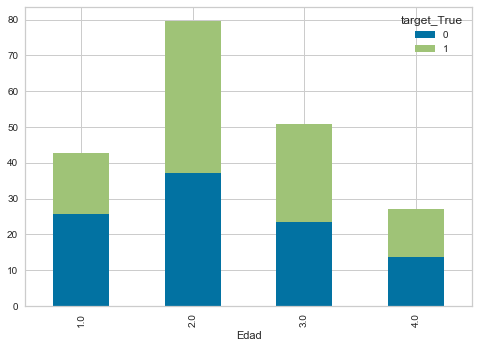

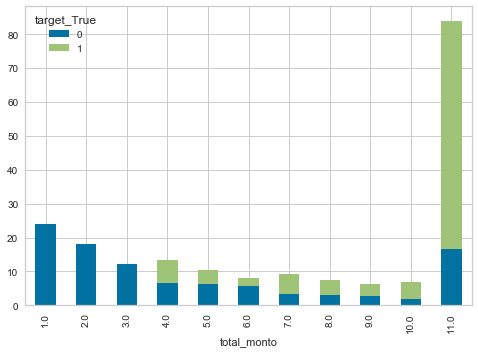

In [449]:
plot = pd.crosstab(index=data['total_scoring_promedio'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['cantidad_de_bancos'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['cantidad_creditos_morosos'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
plot = pd.crosstab(index=data['clusters'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['clusters'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['sex_F'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['Edad'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

plot = pd.crosstab(index=data['total_monto'],
            columns=data['target_True']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

Modelos clasificacion

In [451]:
X=data.drop(['target_True','monto_credito_prom','cantidad_creditos_morosos'], axis=1)
y=data['target_True']

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [453]:
from sklearn.utils import resample

In [454]:
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)# separate minority and majority classes
negative = train_data[train_data.target_True==0]
positive = train_data[train_data.target_True==1]# upsample minority
pos_upsampled = resample(positive,
     replace=True, # sample with replacement
     n_samples=len(negative), # match number in majority class
     random_state=27) # reproducible results# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])# check new class counts
upsampled.target_True.value_counts()

1    31789
0    31789
Name: target_True, dtype: int64

In [455]:
X_train = upsampled.drop(columns='target_True')

In [456]:
y_train = upsampled['target_True']

In [457]:
data = data['target_True'].value_counts()

Randon fores

In [466]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y, random_state = 12)

In [467]:
#importo el modelo
from sklearn.ensemble import RandomForestClassifier

In [468]:
#entreno una primer variante de modelo con 100 árboles de decisión y obtengo el accuracy
rf = RandomForestClassifier(n_estimators = 100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.9920036906043365


In [469]:
#entreno una segunda variante con más cantidad de árboles para intentar mejorar el accuracy
rf = RandomForestClassifier(n_estimators = 1000, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
print("accuracy: ",rf.score(X_test,y_test))

accuracy:  0.9924650161463939


In [470]:
#imprimo las features que el modelo clasificó como más importantes o las 'mejor predictoras' (solo las primeras 10)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(25)

,importancia_relativa
total_monto,0.258247
Monto 1,0.201227
Monto 2,0.089343
Sit 1,0.066981
scoring_total,0.064510
Sit 2,0.053580
ID,0.045974
Monto 3,0.044619
total_scoring_promedio,0.037189
Sit 3,0.034523


In [471]:
#función para graficar la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(y_test,y_pred):
    names=["Buen desempeño","Mal desempeño"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

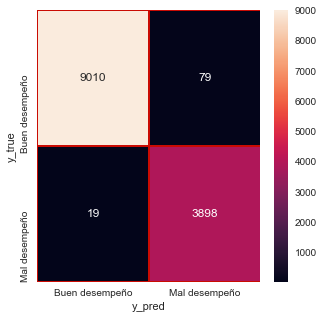

In [472]:
#realizo predicciones y grafico la matriz de confusión
y_pred=rf.predict(X_test)
confusion(y_test,y_pred)

Entrenamiento modelo: XGB Classifier

In [473]:
#Imports para entrenamiento, predicción y evaluación del modelo
import xgboost as xgb

In [474]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
print("accuracy: ",xgb_model.score(X_test,y_test))

accuracy:  0.9963093956635399


In [475]:
feature_importances = pd.DataFrame(xgb_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importancia_relativa']).sort_values('importancia_relativa',ascending=False)
feature_importances.head(25)

,importancia_relativa
total_scoring_promedio,0.366491
total_monto,0.331374
Monto 1,0.074992
Sit 2,0.060851
Sit 1,0.047654
Sit 3,0.043616
Sit 4,0.016550
scoring_total,0.010691
Monto 2,0.010076
Sit 5,0.007989


In [538]:
data.loc[data['target_True']==0, 'target_True'] = 'no moroso'
data.loc[data['target_True']==1, 'target_True'] = 'moroso'

In [539]:
data.to_csv("C:/Users/Ariel Fleiderman/Downloads/CLUSTER CREDITO1.csv")

In [540]:
data.head()

,target_True,sex_0,sex_C,sex_F,sex_M,ID,Edad,Sit 1,Monto 1,Sit 2,...,Monto 5,Sit 6,Monto 6,total_monto,scoring_total,cantidad_de_bancos,total_scoring_promedio,monto_credito_prom,cantidad_creditos_morosos,clusters
0,moroso,0,0,0,1,1,1.0,1,4.0,1.0,...,11.0,1.0,7.0,11.0,9.0,6,2.0,5.0,1,0
1,moroso,0,0,0,1,2,3.0,1,3.0,1.0,...,3.0,1.0,1.0,11.0,9.0,6,2.0,4.0,1,0
2,no moroso,0,0,0,1,3,2.0,1,1.0,1.0,...,1.0,1.0,2.0,11.0,9.0,6,2.0,3.0,1,0
3,no moroso,0,0,1,0,4,3.0,1,2.0,1.0,...,1.0,1.0,4.0,11.0,9.0,6,2.0,3.0,1,0
4,no moroso,0,0,1,0,5,2.0,1,2.0,1.0,...,3.0,1.0,1.0,11.0,9.0,6,2.0,3.0,1,0


regresion logistica

https://github.com/brunokatekawa/credit_risk/blob/master/Credit_Risk.ipynb